## Problem 1

In [50]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go



train_df = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/2/healthcareTrain.csv')
test_df = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/2/healthcareTest.csv')
train_df.head()

,patIndex,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,...,brand_cost,ratio_G_total_cost,numofgen_post,numofbrand_post,generic_cost_post,brand_cost_post,ratio_G_total_cost_post,pdc_80_flag,drug_class,patient_key
0,2393,0.500000,0,0,2,0,3,2,2.333333,1.0,...,0.000000,1.000000,3,0,39.557654,0.0,1.0,0,*ANTIDIABETICS*,322512
1,2148,0.994444,0,0,3,0,17,5,26.500000,1.0,...,19.553557,0.929937,17,0,547.646290,0.0,1.0,1,*ANTIDIABETICS*,291191
2,1799,0.472222,0,0,3,0,3,1,3.000000,1.0,...,0.000000,1.000000,3,0,8.834483,0.0,1.0,0,*ANTIDIABETICS*,251767
3,636,0.166667,0,0,0,0,2,2,2.000000,1.0,...,243.805101,NaN,2,0,8.100969,0.0,1.0,0,*ANTIDIABETICS*,80678
4,114,0.944444,0,0,3,0,12,2,12.000000,1.0,...,0.000000,1.000000,12,0,50.324328,0.0,1.0,1,*ANTIDIABETICS*,16047


In [51]:
test_df.head()

,patIndex,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,...,brand_cost,ratio_G_total_cost,numofgen_post,numofbrand_post,generic_cost_post,brand_cost_post,ratio_G_total_cost_post,pdc_80_flag,drug_class,patient_key
0,2,0.333333,0,0,4,0,15,5,14.466667,0.101382,...,2984.927229,0.010155,2,13,196.359216,3001.501507,0.061403,0,*ANTIDIABETICS*,168
1,5,0.866667,0,0,5,0,16,4,18.000000,0.888889,...,0.000000,1.000000,14,2,671.755173,735.661568,0.477297,1,*ANTIDIABETICS*,499
2,21,0.500000,0,0,0,0,8,6,8.000000,0.875000,...,0.000000,1.000000,7,1,50.160767,41.220633,0.548917,0,*ANTIDIABETICS*,1830
3,22,0.977778,0,0,9,0,40,9,42.533333,0.835423,...,1345.104492,0.339094,33,7,842.908516,1695.649323,0.332042,1,*ANTIDIABETICS*,1852
4,33,0.527778,0,0,6,0,28,7,28.000000,0.964286,...,0.000000,1.000000,27,1,1163.290225,6.514435,0.994431,0,*ANTIDIABETICS*,3369


In [52]:
features = ["pre_rx_cost","numofgen","numofbrand","generic_cost","adjust_total_30d","num_er"]
target = ["pdc_80_flag"] 

In [53]:
train_x = train_df[features].values
train_y = train_df[target].values
test_x = test_df[features].values
test_y = test_df[target].values

print(train_y.shape)
print(test_y.shape)


(1378, 1)
(344, 1)


In [54]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [55]:
train_y = train_y.flatten()
test_y = test_y.ravel()
print(train_y.shape)
print(test_y.shape)


(1378,)
(344,)


In [56]:
k = range(75, 106, 2)
acuracy_results = {}

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(train_x, train_y)
    y_pred = knn.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    acuracy_results[i] = accuracy 

acuracy_df = pd.DataFrame(list(acuracy_results.items()), columns = ["k" , "accuracy"])
print(acuracy_df)

      k  accuracy
0    75  0.668605
1    77  0.665698
2    79  0.668605
3    81  0.665698
4    83  0.662791
5    85  0.665698
6    87  0.665698
7    89  0.665698
8    91  0.665698
9    93  0.654070
10   95  0.659884
11   97  0.662791
12   99  0.668605
13  101  0.671512
14  103  0.677326
15  105  0.668605


In [57]:
fig = px.line(acuracy_df, x="k", y="accuracy", title="Accuracy vs. K for k-NN",
              labels={"k": "Number of Neighbors (k)", "Accuracy": "Accuracy (%)"})
fig.show()

In [58]:
best_k = acuracy_df.loc[acuracy_df["accuracy"].idxmax()]
print(f"Best K for KNN: {best_k['k']} with Accuracy: {best_k['accuracy']:.1%}")

Best K for KNN: 103.0 with Accuracy: 67.7%


The best KNN model was found at K = 103, achieving 67.7% accuracy

## Problem 2

In [59]:
symbolic_feature = "regionN"
train_df[symbolic_feature].unique()

array([2, 3, 4, 1])

In [60]:
symbolic_feature = "regionN"
train_df[symbolic_feature].isna().sum()

0

In [61]:
region_counts = train_df.groupby(symbolic_feature)[target].value_counts(normalize=True).unstack().fillna(0)

print("\nConditional Probabilities P(pdc_80_flag(0,1) | region):\n", region_counts)


Conditional Probabilities P(pdc_80_flag(0,1) | region):
 pdc_80_flag         0         1
regionN                        
1            0.495495  0.504505
2            0.568579  0.431421
3            0.645995  0.354005
4            0.576087  0.423913


In [62]:
def vdm_distance(v1,v2, p=2):
    return sum(abs(region_counts.loc[v1,c] - region_counts.loc[v2,c]) ** p for c in region_counts.columns)

region = train_df[symbolic_feature].unique()
vdm_matrix = pd.DataFrame(index= region, columns=region)
for r1 in region:
    for r2 in region: 
        vdm_matrix.loc[r1,r2] = vdm_distance(r1,r2)
print("\nValue Distance Metric Distance Matrix:\n", vdm_matrix)      


Value Distance Metric Distance Matrix:
           2         3         4         1
2       0.0  0.011987  0.000113  0.010682
3  0.011987       0.0  0.009774    0.0453
4  0.000113  0.009774       0.0   0.01299
1  0.010682    0.0453   0.01299       0.0


In [63]:
region_map = {i: np.mean(vdm_matrix.loc[i].astype(float)) for i in region}
region_map

{2: 0.005695394831835613,
 3: 0.01676522076282075,
 4: 0.0057192353821022895,
 1: 0.017243083637662106}

In [64]:
train_df["region_encode"] = train_df["regionN"].map(region_map)
train_df["region_encode"]

0       0.005695
1       0.005695
2       0.005695
3       0.016765
4       0.005719
          ...   
1373    0.017243
1374    0.016765
1375    0.016765
1376    0.016765
1377    0.005695
Name: region_encode, Length: 1378, dtype: float64

In [65]:
test_df["region_encode"] = test_df["regionN"].map(region_map)
test_df["region_encode"]

0      0.016765
1      0.016765
2      0.016765
3      0.016765
4      0.016765
         ...   
339    0.017243
340    0.017243
341    0.005719
342    0.016765
343    0.016765
Name: region_encode, Length: 344, dtype: float64

In [66]:
feature_columns = ["pre_rx_cost","numofgen","numofbrand","generic_cost","adjust_total_30d","num_er"]
train_x2 = train_df[feature_columns].values
test_x2 = test_df[feature_columns].values
train_y2 = train_df[target].values
test_y2 = test_df[target].values

In [67]:
train_x2 = np.column_stack((train_x2, train_df["region_encode"].values))
test_x2 = np.column_stack((test_x2, test_df["region_encode"].values))


In [68]:
print(train_x2.shape)
print(test_x2.shape)

(1378, 7)
(344, 7)


In [69]:
train_x2 = scaler.fit_transform(train_x2)
test_x2 = scaler.transform(test_x2)

In [70]:
def weighted_knn(train_x, train_y, test_x, k, distance_function):
    predictions = []

    for test_point in test_x:
        distances = [(distance_function(test_point, train_point), train_y[j]) for j, train_point in enumerate(train_x)]
        distances.sort(key=lambda x: x[0])
        k_neighbors = distances[:k]  

        label_weights = {}
        for dist, label in k_neighbors:
            weight = 1 / ((dist + 1e-5) ** 2)
            label_weights[label.item()] = label_weights.get(label.item(), 0) + weight

        predicted_label = max(label_weights, key=label_weights.get)
        predictions.append(predicted_label)

    return np.array(predictions)
    
def l2_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def l1_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def linf_distance(x1, x2):
    return np.max(np.abs(x1 - x2))

In [71]:
kvalues = range(75,106,2)
accuracy_weighted_l1 = []
accuracy_weighted_l2 = []
accuracy_weighted_linf = []

for k in kvalues:
    predictions_l1 = weighted_knn(train_x2, train_y, test_x2, k, l1_distance)
    predictions_l2 = weighted_knn(train_x2, train_y, test_x2, k, l2_distance)
    predictions_linf = weighted_knn(train_x2, train_y, test_x2, k, linf_distance)

    acc_l1 = np.mean(predictions_l1 == test_y) * 100
    acc_l2 = np.mean(predictions_l2 == test_y) * 100
    acc_linf = np.mean(predictions_linf == test_y) * 100

    accuracy_weighted_l1.append(acc_l1)
    accuracy_weighted_l2.append(acc_l2)
    accuracy_weighted_linf.append(acc_linf)

    print(f"k={k}: L1 = {acc_l1:.2f}%, L2 = {acc_l2:.2f}%, L_inf = {acc_linf:.2f}%")

k=75: L1 = 61.63%, L2 = 63.66%, L_inf = 63.95%
k=77: L1 = 62.21%, L2 = 63.08%, L_inf = 64.53%
k=79: L1 = 61.92%, L2 = 63.08%, L_inf = 64.83%
k=81: L1 = 61.63%, L2 = 63.08%, L_inf = 64.53%
k=83: L1 = 61.92%, L2 = 63.66%, L_inf = 64.53%
k=85: L1 = 61.05%, L2 = 63.95%, L_inf = 64.53%
k=87: L1 = 61.34%, L2 = 63.66%, L_inf = 64.24%
k=89: L1 = 60.76%, L2 = 63.66%, L_inf = 64.53%
k=91: L1 = 61.05%, L2 = 63.66%, L_inf = 64.53%
k=93: L1 = 60.47%, L2 = 63.37%, L_inf = 64.53%
k=95: L1 = 60.47%, L2 = 63.66%, L_inf = 64.53%
k=97: L1 = 60.47%, L2 = 63.37%, L_inf = 64.24%
k=99: L1 = 60.76%, L2 = 63.08%, L_inf = 63.95%
k=101: L1 = 60.76%, L2 = 63.37%, L_inf = 64.24%
k=103: L1 = 60.76%, L2 = 63.08%, L_inf = 63.95%
k=105: L1 = 61.05%, L2 = 63.37%, L_inf = 63.66%


In [72]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(kvalues),
    y=accuracy_weighted_l1,
    mode='lines+markers',
    name="Weighted k-NN",
    marker=dict(color="red", symbol='square'),
    line=dict(dash='dash')
))

fig.update_layout(
    title="Weighted k-NN Accuracy vs. k (Including VDM for `regionN`)",
    xaxis_title="k Value",
    yaxis_title="Accuracy (%)",
    xaxis=dict(tickmode="linear"),
    yaxis=dict(range=[min(accuracy_weighted_l1) - 2, max(accuracy_weighted_l1) + 2]),
    template="plotly_white"
)
fig.show()

In [73]:
best_k = kvalues[np.argmax(accuracy_weighted_linf)]  
final_predictions = weighted_knn(train_x2, train_y, test_x2, best_k, l2_distance)

for i in [99, 199, 299]:
    if i < len(test_y):
        print(f"Test Point {i+1}: Predicted = {final_predictions[i]}, Actual = {test_y[i]}")
    else:
        print(f"Test Point {i+1} is out of range (not enough test samples).")

Test Point 100: Predicted = 0, Actual = 0
Test Point 200: Predicted = 0, Actual = 0
Test Point 300: Predicted = 0, Actual = 0


# Probelm 3

In [74]:
def f(x):
    return x**2 + 6*x
def df(x):
    return 2*x + 6

x_min = -6 / 2  # Solve 2x + 6 = 0 → x = -3
print(f"Analytical Minimum: x = {x_min}, f(x) = {f(x_min)}")

Analytical Minimum: x = -3.0, f(x) = -9.0


In [75]:
def gradient_descent(alpha = 0.1, tolerance =  1e-5):
    x = np.random.uniform(-10,10)
    history = [x]

    for i in range(1000):
        xnew = x - alpha * df(x)
        history.append(xnew)
        if abs(xnew - x) < tolerance: 
            break 
        x = xnew
    return x, f(x), history 
x_min, f_min, history = gradient_descent()
print(f"Gradient Descent Minimum: x = {x_min:.5f}, f(x) = {f_min:.5f}")


Gradient Descent Minimum: x = -2.99995, f(x) = -9.00000


# Problem 4

In [76]:
df2 = pd.read_csv('/Users/aran/Desktop/Semester_2/machine learning/assignment/2/ORing.csv')
df2.head()

,Temp,Failure
0,53,1
1,56,1
2,57,1
3,63,0
4,66,0


In [77]:
df2.shape

(24, 2)

In [78]:
def normalize(x, M, sd):
    return (x - M) / sd

mean = df2["Temp"].mean()
std = df2["Temp"].std()

df2["Normalized_Temp"] = df2["Temp"].apply(lambda x: normalize(x, mean, std))
df2.head()

,Temp,Failure,Normalized_Temp
0,53,1,-2.293007
1,56,1,-1.886366
2,57,1,-1.750818
3,63,0,-0.937535
4,66,0,-0.530893


In [79]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

In [80]:
def cost_function(X, y, w0, w1):
    N = len(y)
    total_cost = 0
    for i in range(N):
        z = w0 + w1 * X[i]
        P = sigmoid(z)
        total_cost += y[i] * np.log(P) + (1 - y[i]) * np.log(1 - P)
    return -total_cost / N

In [81]:
def gradient_descent(X, y, w0, w1, alpha, iterations):
    N = len(y)
    for k in range(iterations):
        d_w0, d_w1 = 0, 0
        for i in range(N):
            z = w0 + w1 * X[i]
            P = sigmoid(z)
            d_w0 += (P - y[i])
            d_w1 += (P - y[i]) * X[i]

        w0 -= alpha * (d_w0 / N)
        w1 -= alpha * (d_w1 / N)
    
    return w0, w1

In [82]:
X = df2["Normalized_Temp"].values
y = df2["Failure"].values

In [83]:
w0, w1 = gradient_descent(X, y, w0=0, w1=0, alpha=0.1, iterations=1000)
df2['Predicted Probability'] = sigmoid(w1 * df2["Normalized_Temp"] + w0)

In [84]:
print(f" Final Weights: w0 = {w0:.4f}, w1 = {w1:.4f}")
print(df2[['Temp', 'Failure', 'Predicted Probability']].head())

 Final Weights: w0 = -1.1028, w1 = -1.2639
   Temp  Failure  Predicted Probability
0    53        1               0.857572
1    56        1               0.782676
2    57        1               0.752132
3    63        0               0.520524
4    66        0               0.393697


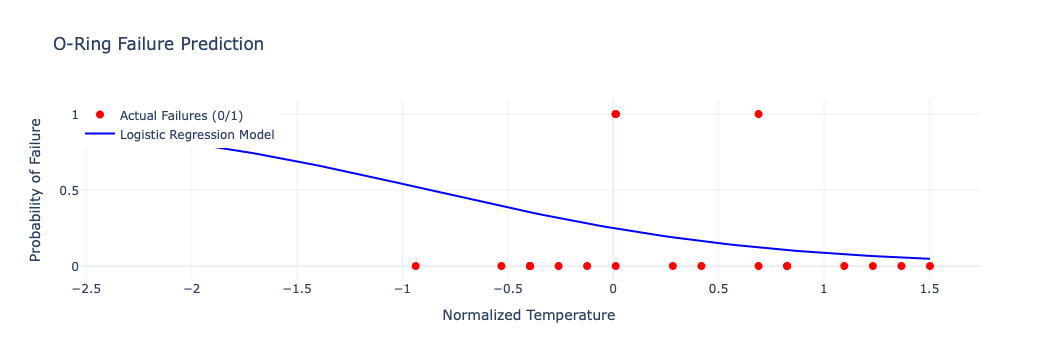

In [85]:
scatter = go.Scatter(
    x=df2["Normalized_Temp"],
    y=df2["Failure"],
    mode="markers",
    marker=dict(color="red", size=8),
    name="Actual Failures (0/1)"
)


x_range = np.linspace(min(X), max(X), 100)
y_pred = sigmoid(w1 * x_range + w0)

logistic_curve = go.Scatter(
    x=x_range,
    y=y_pred,
    mode="lines",
    line=dict(color="blue", width=2),
    name="Logistic Regression Model"
)


fig = go.Figure([scatter, logistic_curve])
fig.update_layout(
    title="O-Ring Failure Prediction",
    xaxis_title="Normalized Temperature",
    yaxis_title="Probability of Failure",
    template="plotly_white",
    legend=dict(x=0, y=1)
)

fig.show()

In [86]:

temp_norm_31 = (31 - mean) / std
prob_failure_31 = sigmoid(w0 + w1 * temp_norm_31)

# Output result
print(f"Probability of O-Ring failure at 31°F: {prob_failure_31:.4f}")

Probability of O-Ring failure at 31°F: 0.9962
